In [1]:
import soundfile as sf
import numpy as np
from scipy.signal import lfilter
from pydub import AudioSegment
from pydub import AudioSegment
from pydub.playback import play
import pygame
import time
import matplotlib.pyplot as plt
import pandas as pd

def obtener_duracion_audio(ruta_archivo):
    audio = AudioSegment.from_file(ruta_archivo)
    duracion_ms = len(audio)
    duracion_seg = duracion_ms / 1000
    return duracion_seg

def calculate_snr(audio):
    # Calcular la relación señal a ruido (SNR)
    audio, sample_rate = sf.read(audio)
    signal_power = np.sum(audio ** 2)
    noise_power = np.sum(lfilter([1], [1, -0.99], audio) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_thd(audio):
    # Calcular la distorsión armónica total (THD)
    audiop, sample_rate = sf.read(audio)
    fundamental = np.max(audiop)
    harmonics = np.sqrt(np.sum(audiop ** 2)) - np.abs(fundamental)
    thd = 20 * np.log10(harmonics / fundamental)
    return thd

def promedio_potencia(audio_path):
    audio, sample_rate = sf.read(audio_path)
    energy = np.sum(audio ** 2) / len(audio)
    # Calcular el nivel promedio de potencia (PMS)
    pms = 10 * np.log10(energy)
    return pms

def nivel_peak(audio_path):
    audio, sr = sf.read(audio_path)
    # Calcular el nivel peak
    peak = 20 * np.log10(np.max(np.abs(audio)))
    return peak
    # Calcular la relación señal a ruido (SNR)
    #snr = calculate_snr(audio)

    # Calcular la distorsión armónica total (THD)
    #thd = calculate_thd(audio)

    # Imprimir los resultados
    #print("Promedio de nivel de potencia (PMS): ", pms)
    #print("Nivel de pico: ", peak)
    #print("Relación señal a ruido (SNR): ", snr)
    #print("Distorsión armónica total (THD): ", thd)

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


pygame 2.4.0 (SDL 2.26.4, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# def evaluar_audio(a):
#     if calculate_snr(a)>-3: #descarta risas de fondo de MELD (ruido)
#         return False
#     if calculate_thd(a)<18: #quita sonidos
#         return False
#     if promedio_potencia(a)<-50: #mide promedio de volumen
#         return False
#     if nivel_peak(a)<-35: #mide volumen maximo
#         return False
#     if obtener_duracion_audio(a)< 0.8: #quita audios cortos
#         return False
#     # Si todos los criterios se cumplen, el audio es de buena calidad
#     return True

In [3]:
# import os
# #directorio_inicial1 = r"D:\sentirobots\Datasets\MELD\Audios_MELD\probando"
# directorio_inicial1 = r"D:\sentirobots\Datasets\MELD\Audios_MELD\audios_meld"
# archivos1=[]
# duracion_a=[]
# pasa=[]
# pic=[]
# mean_pot=[]
# relacion_sr=[]
# distorcion_armonicaT=[]
# archi=[]
# for raiz, carpetas, archivos_en_carpeta in os.walk(directorio_inicial1):
#     # Iteramos por cada archivo en la carpeta actual y lo agregamos a la lista de archivos
#     for archivo in archivos_en_carpeta:
#         # Verificamos si el elemento actual es un archivo
#         archi.append(archivo)
#         if os.path.isfile(os.path.join(raiz, archivo)):
#             ruta_completa1 = os.path.join(raiz, archivo)
#             archivos1.append(ruta_completa1)
#             duracion = obtener_duracion_audio(ruta_completa1)
#             prom_pot = promedio_potencia(ruta_completa1)
#             peak = nivel_peak(ruta_completa1)
#             rsr= calculate_snr(ruta_completa1)
#             dat=calculate_thd(ruta_completa1)
#             mean_pot.append(prom_pot)
#             pic.append(peak)
#             relacion_sr.append(rsr)
#             distorcion_armonicaT.append(dat)
#             duracion_a.append(duracion)
#             #print("Duración del audio:", duracion, "segundos")
#             if(evaluar_audio(ruta_completa1)):
#                pasa.append(1)
#             else:
#                pasa.append(0)


In [4]:
# import pandas as pd
# #Real
# archiv={"RutaArchivo": archivos1}
# df= pd.DataFrame(archiv)
# df["Nombre archivo"] = archi
# df["duracion"] = duracion_a
# df["Promedio level pot"] = mean_pot
# df["Nivel peak"] = pic
# df["Distorsión armónica total"] = distorcion_armonicaT
# df["Relación señal a ruido"] = relacion_sr
# df["Filtro"] = pasa
# df

In [6]:
rutaa= r'D:\sentirobots\Coherencia cohesion\MELD-Train-TCREO.csv'
df = pd.read_csv(rutaa)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type,Transcripcion,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,5.675,-22.259755,-7.097227,38.721207,-3.848264,1,0,1,train,also I was the point person on my company's tr...,also i was the point person on my companys tra...,also point person companys transition kl gr sy...,"['also', 'point', 'person', 'companys', 'trans...",1,1
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.472,-21.209454,-7.174382,34.262080,-3.901110,1,0,1,train,You must've had your hands full.,you mustve had your hands full,mustve hands full,"['mustve', 'hands', 'full']",1,1
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt10,2.005,-20.788790,-3.946897,36.785569,-3.476114,1,0,1,train,No don't I beg of you!,no dont i beg of you,dont beg,"['dont', 'beg']",1,1
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt2,2.944,-26.107801,-5.913118,35.514479,-3.579053,1,0,1,train,That I did. That I did.,that i did that i did,NaN,[],1,1
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt11,8.320,-22.186693,-5.517004,40.270098,-3.719142,1,0,1,train,"All right then, we'll have a definite answer f...",all right then well have a definite answer for...,right well definite answer monday think say co...,"['right', 'well', 'definite', 'answer', 'monda...",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt0,3.435,-26.453004,-15.802202,41.076034,-3.940817,1,0,1,train,"Yeah, all the time. I want the baby to know my...",yeah all the time i want the baby to know my v...,yeah time want baby know voice,"['yeah', 'time', 'want', 'baby', 'know', 'voice']",1,1
9894,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt1,1.963,-32.624446,-18.518943,35.116233,-3.918997,1,0,1,train,"Do you uh, do you talk about me?",do you uh do you talk about me,uh talk,"['uh', 'talk']",1,1
9895,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt2,2.581,-25.588333,-13.781023,38.654702,-3.866420,1,0,1,train,"Yeah, yeah, all the time.",yeah yeah all the time,yeah yeah time,"['yeah', 'yeah', 'time']",1,1
9896,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt3,0.875,-31.902457,-20.135711,33.922975,-3.905893,1,0,1,train,Really?,really,really,['really'],1,1


In [5]:
condicion1 = df['duracion'] < 0.8
condicion2 = df['Promedio level pot'] <-50
condicion3 = df['Nivel peak'] <-35
condicion4 = df['Distorsión armónica total'] <18
condicion5 = df['Relación señal a ruido'] > -3

df['Falla en'] = pd.concat([condicion1, condicion2, condicion3, condicion4, condicion5], axis=1).sum(axis=1)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0.wav,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1.wav,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0.wav,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0.wav,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0.wav,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0
...,...,...,...,...,...,...,...,...,...
11095,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5.wav,0.640,-23.310790,-11.532602,32.525006,-3.947483,0,1
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6.wav,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7.wav,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8.wav,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0


In [7]:
conteo = df['Filtro'].value_counts()
print(conteo)

1    9270
0     628
Name: Filtro, dtype: int64


In [8]:
df_fallas = df[df['Filtro'] == 0].copy()
df_buenas = df[df['Filtro'] == 1].copy()

In [9]:
df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,TCREO,Filtro_Texto
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.0,9898.0,9898.0
mean,3.154641,-27.861611,-13.429036,36.359237,-3.870204,0.936553,0.063447,1.0,1.0,1.0
std,2.421374,4.372729,4.145308,3.266512,0.136293,0.243778,0.243778,0.0,0.0,0.0
min,0.064000,-52.851215,-35.314272,18.354333,-4.101775,0.000000,0.000000,1.0,1.0,1.0
25%,1.579000,-30.196541,-15.487149,34.444712,-3.941554,1.000000,0.000000,1.0,1.0,1.0
50%,2.475000,-27.752360,-13.423184,36.640225,-3.917289,1.000000,0.000000,1.0,1.0,1.0
75%,3.925000,-25.459529,-11.566167,38.590666,-3.857415,1.000000,0.000000,1.0,1.0,1.0
max,41.045000,-14.116547,-0.912558,46.415445,-3.000761,1.000000,1.000000,1.0,1.0,1.0


In [10]:
# Crear una copia del DataFrame original con la condición
duracion_df = df_fallas[df_fallas['duracion'] < 0.8].copy()
conteos = duracion_df['Filtro'].value_counts()
print(conteos)
duracion_df

0    625
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type,Transcripcion,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto
44,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia1001_utt9,0.128,-27.932799,-11.801725,20.611563,-3.956065,0,1,1,train,"Yeah, someplace nice.",yeah someplace nice,yeah someplace nice,"['yeah', 'someplace', 'nice']",1,1
45,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia2_utt8,0.640,-25.798539,-12.470448,30.934888,-3.848013,0,1,1,train,Can I get a beer.,can i get a beer,get beer,"['get', 'beer']",1,1
75,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia4_utt1,0.128,-37.451310,-28.783474,28.529403,-3.957244,0,1,1,train,Hi!,hi,hi,['hi'],1,1
83,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia4_utt5,0.085,-29.683214,-21.106082,30.270478,-3.937350,0,1,1,train,Hi.,hi,hi,['hi'],1,1
85,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia4_utt6,0.256,-34.419118,-19.777045,26.099384,-3.890992,0,1,1,train,Hi.,hi,hi,['hi'],1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia992_utt1,0.405,-25.950086,-13.746117,33.670129,-3.984702,0,1,1,train,Hey.,hey,hey,['hey'],1,1
9841,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia992_utt11,0.427,-27.325527,-14.177260,33.900284,-4.005293,0,1,1,train,Uh-huh.,uhhuh,uhhuh,['uhhuh'],1,1
9847,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia993_utt1,0.128,-40.645375,-29.737574,26.235947,-3.962430,0,1,1,train,Hey!,hey,hey,['hey'],1,1
9874,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia996_utt15,0.128,-23.995730,-14.628070,27.802240,-3.952598,0,1,1,train,Or?,or,NaN,[],1,1


In [10]:
duracion_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.0,743.000000
mean,0.486517,-29.531455,-17.410750,31.042345,-3.873944,0.0,1.079408
std,0.215552,7.131327,7.239578,3.033374,0.234786,0.0,0.348881
min,0.064000,-60.036337,-49.560469,13.627905,-4.061299,0.0,1.000000
25%,0.320000,-32.416903,-19.831535,29.433472,-3.947901,0.0,1.000000
50%,0.533000,-28.161823,-16.084668,31.228016,-3.930115,0.0,1.000000
75%,0.661000,-25.254708,-13.337212,33.260440,-3.896823,0.0,1.000000
max,0.789000,-14.116547,-2.740314,38.072277,-1.482298,0.0,3.000000


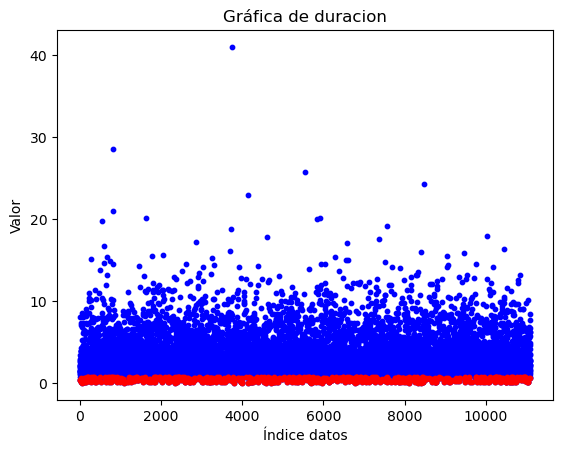

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

column_data = df['duracion']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de duracion')
mask = column_data < 0.8
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [12]:
# from pydub import AudioSegment
# from pydub.playback import play
# import pygame
# import time

# lista = duracion_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     time.sleep(5)
#     pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(5)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [13]:
pot_df = df_fallas[df_fallas['Promedio level pot'] <-50].copy()
conteosp = pot_df['Filtro'].value_counts()
print(conteosp)
pot_df

0    27
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
28,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia105_utt1.wav,0.171,-50.339777,-39.158855,30.450479,-3.968021,0,3
106,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia113_utt3.wav,0.320,-51.754836,-41.273270,30.766417,-3.876714,0,3
298,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia24_utt6.wav,0.939,-56.273045,-41.681723,32.067719,-3.919322,0,2
432,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia36_utt8.wav,0.299,-60.036337,-49.560469,30.464095,-3.904638,0,3
985,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia89_utt7.wav,0.128,-50.207016,-39.477414,29.698462,-3.908777,0,3
1191,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia1007_utt12.wav,0.128,-51.661708,-38.011054,24.285111,-3.924335,0,3
1877,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia134_utt0.wav,1.387,-55.040525,-43.906073,37.628944,-3.980014,0,2
2182,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia164_utt1.wav,1.173,-50.282314,-38.074533,34.773711,-3.823023,0,2
2500,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia18_utt7.wav,0.533,-56.290926,-47.263232,34.525052,-3.742165,0,3
2551,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia195_utt5.wav,1.067,-52.851215,-34.253524,27.779344,-3.936996,0,1


In [14]:
pot_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000
mean,0.689778,-54.277169,-40.926672,30.290237,-3.879572,0.0,2.555556
std,0.624242,4.310058,5.079113,3.814014,0.129930,0.0,0.640513
min,0.128000,-69.768628,-49.560469,23.416089,-3.980014,0.0,1.000000
25%,0.213000,-56.477622,-44.297202,27.750792,-3.939752,0.0,2.000000
50%,0.448000,-52.851215,-40.824673,30.464095,-3.912205,0.0,3.000000
75%,1.003000,-51.311150,-37.700441,32.704093,-3.886485,0.0,3.000000
max,2.496000,-50.207016,-28.525031,37.628944,-3.326782,0.0,3.000000


In [15]:
# lista = pot_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

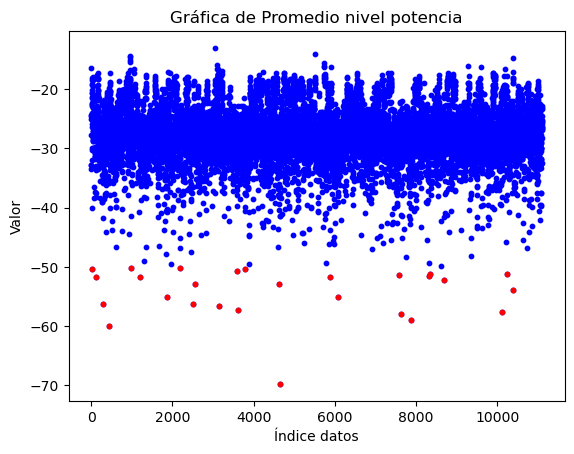

In [16]:
column_data = df['Promedio level pot']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Promedio nivel potencia')
mask = column_data <-50
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [17]:
peak_df = df_fallas[df_fallas['Nivel peak'] <-35].copy()
conteospp = peak_df['Filtro'].value_counts()
print(conteospp)
peak_df

0    35
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
28,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia105_utt1.wav,0.171,-50.339777,-39.158855,30.450479,-3.968021,0,3
106,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia113_utt3.wav,0.320,-51.754836,-41.273270,30.766417,-3.876714,0,3
298,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia24_utt6.wav,0.939,-56.273045,-41.681723,32.067719,-3.919322,0,2
432,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia36_utt8.wav,0.299,-60.036337,-49.560469,30.464095,-3.904638,0,3
985,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia89_utt7.wav,0.128,-50.207016,-39.477414,29.698462,-3.908777,0,3
1191,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia1007_utt12.wav,0.128,-51.661708,-38.011054,24.285111,-3.924335,0,3
1853,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia130_utt17.wav,0.192,-47.771031,-37.206230,28.388480,-3.947712,0,2
1877,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia134_utt0.wav,1.387,-55.040525,-43.906073,37.628944,-3.980014,0,2
2177,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia163_utt6.wav,0.192,-46.846023,-41.976189,34.983163,-3.955982,0,2
2182,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia164_utt1.wav,1.173,-50.282314,-38.074533,34.773711,-3.823023,0,2


In [18]:
peak_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000
mean,0.518686,-52.067432,-40.280479,30.444569,-3.843548,0.0,2.485714
std,0.519231,5.478608,4.461881,3.526171,0.214118,0.0,0.562109
min,0.064000,-69.768628,-49.560469,23.416089,-3.980014,0.0,1.000000
25%,0.149500,-55.720118,-43.038794,28.144188,-3.940492,0.0,2.000000
50%,0.277000,-51.342087,-39.158855,30.464095,-3.912205,0.0,3.000000
75%,0.757000,-49.665098,-36.693798,32.704093,-3.876643,0.0,3.000000
max,2.005000,-41.027322,-35.025476,37.628944,-2.879670,0.0,3.000000


In [19]:
# lista = peak_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

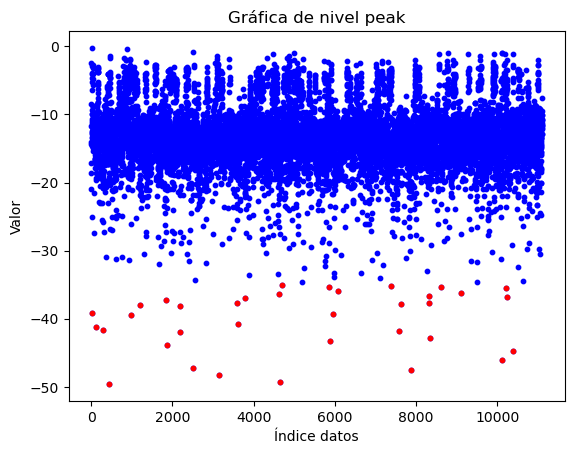

In [20]:
column_data = df['Nivel peak']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de nivel peak')
mask = column_data <-35
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [12]:
dis_df = df_fallas[df_fallas['Distorsión armónica total'] >44].copy()
conteosppd = dis_df['Filtro'].value_counts()
print(conteosppd)
dis_df

Series([], Name: Filtro, dtype: int64)


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type,Transcripcion,Transcripcion2,Texto_without_stopwords,Tokens,TCREO,Filtro_Texto


In [22]:
dis_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0
mean,0.192000,-40.740477,-17.458880,14.555074,-3.918486,0.0,2.0
std,0.060811,1.145761,3.403238,1.311215,0.036547,0.0,0.0
min,0.149000,-41.550652,-19.865332,13.627905,-3.944329,0.0,2.0
25%,0.170500,-41.145565,-18.662106,14.091490,-3.931408,0.0,2.0
50%,0.192000,-40.740477,-17.458880,14.555074,-3.918486,0.0,2.0
75%,0.213500,-40.335390,-16.255654,15.018659,-3.905565,0.0,2.0
max,0.235000,-39.930302,-15.052428,15.482243,-3.892644,0.0,2.0


In [25]:
# lista = dis_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

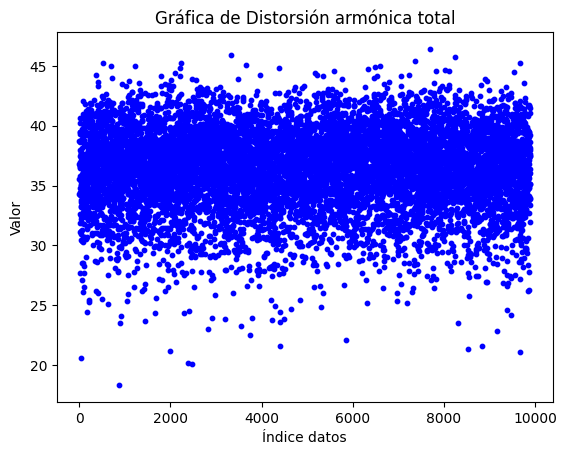

In [11]:
column_data = df['Distorsión armónica total']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Distorsión armónica total')
mask = column_data <18
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [27]:
rsr_df = df_fallas[df_fallas['Relación señal a ruido'] > -3].copy()
conteosppde = rsr_df['Filtro'].value_counts()
print(conteosppde)
rsr_df

0    65
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
293,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia24_utt1.wav,0.171,-35.188280,-25.771847,29.558326,-2.629101,0,2
403,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia32_utt5.wav,2.645,-21.187065,-6.403185,37.860776,-2.881063,0,1
685,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia63_utt20.wav,2.496,-18.565334,-5.424446,37.525613,-2.875760,0,1
767,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia6_utt3.wav,3.115,-20.086296,-5.262620,36.424719,-2.873546,0,1
824,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia74_utt6.wav,1.835,-22.362599,-8.100572,34.658760,-2.447584,0,1
...,...,...,...,...,...,...,...,...,...
10603,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia953_utt16.wav,0.128,-28.499455,-18.532364,27.177496,-1.482298,0,2
10763,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia967_utt9.wav,1.963,-20.203883,-8.229505,37.349329,-2.489986,0,1
10990,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia991_utt14.wav,2.347,-19.072395,-3.899426,37.032637,-2.959941,0,1
11077,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt18.wav,1.984,-29.875951,-13.464305,32.811711,-2.995688,0,1


In [28]:
rsr_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000
mean,2.375877,-26.529509,-12.949161,34.680558,-2.713624,0.0,1.230769
std,3.147411,6.777133,7.256041,3.503136,0.326242,0.0,0.459933
min,0.085000,-46.161865,-35.329741,27.177496,-2.999171,0.0,1.000000
25%,0.939000,-29.940753,-15.985592,32.665950,-2.934512,0.0,1.000000
50%,1.685000,-26.104920,-11.282248,35.127286,-2.838262,0.0,1.000000
75%,2.432000,-21.556413,-8.100572,37.098394,-2.570279,0.0,1.000000
max,16.064000,-13.051605,-2.495594,42.513131,-1.482298,0.0,3.000000


In [30]:
# lista = rsr_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()

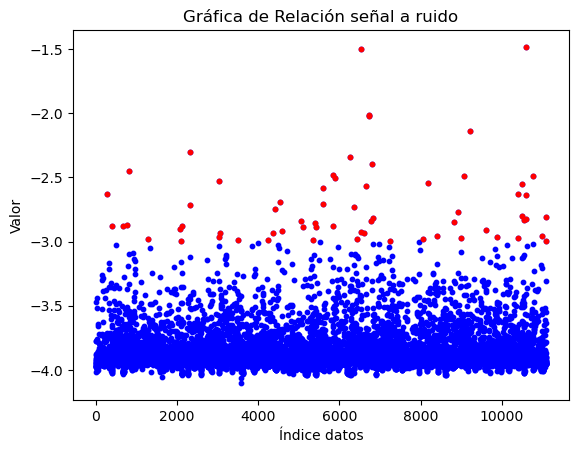

In [31]:
column_data = df['Relación señal a ruido']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Relación señal a ruido')
mask = column_data > -3
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [32]:
# lista = df_fallas['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [33]:
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
16,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt13.wav,0.384,-40.136518,-25.017364,26.779590,-3.959664,0,1
21,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt4.wav,0.427,-22.805300,-11.285164,30.983262,-3.974725,0,1
28,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia105_utt1.wav,0.171,-50.339777,-39.158855,30.450479,-3.968021,0,3
47,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia107_utt2.wav,0.704,-25.379850,-12.372965,31.690100,-4.005600,0,1
58,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia108_utt4.wav,0.320,-24.548193,-15.395014,32.130394,-3.940173,0,1
...,...,...,...,...,...,...,...,...,...
11038,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia996_utt18.wav,0.149,-42.109084,-30.493345,26.274047,-3.897995,0,1
11067,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt0.wav,0.640,-30.050547,-14.802616,30.110974,-3.784636,0,1
11077,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt18.wav,1.984,-29.875951,-13.464305,32.811711,-2.995688,0,1
11085,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt9.wav,3.520,-25.569729,-10.887194,37.106925,-2.808604,0,1


In [34]:
df_buenas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0.wav,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1.wav,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0.wav,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0.wav,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0.wav,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0
...,...,...,...,...,...,...,...,...,...
11094,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt4.wav,1.685,-26.371455,-12.155398,34.329970,-3.933217,1,0
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6.wav,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7.wav,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8.wav,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0


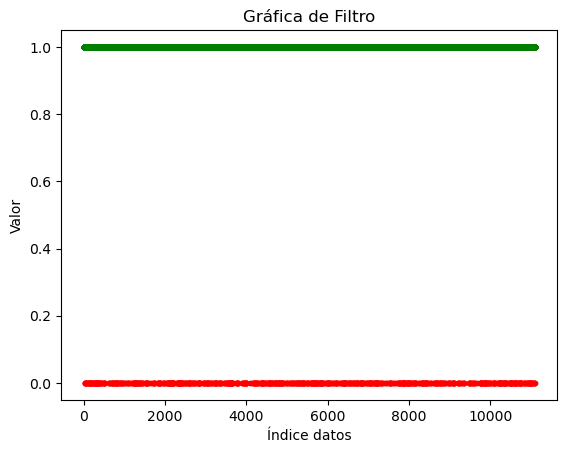

In [35]:
column_data = df['Filtro']
plt.scatter(range(len(column_data)), column_data, s=10, color='red')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Filtro')
mask = column_data > 0
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='green')
plt.show()

In [36]:
condicion = df_fallas['Falla en'] <= 1
df_fallas['Filtro2'] = condicion.astype(int)
df_fallas.loc[condicion, 'Filtro2'] = 1
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
16,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt13.wav,0.384,-40.136518,-25.017364,26.779590,-3.959664,0,1,1
21,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt4.wav,0.427,-22.805300,-11.285164,30.983262,-3.974725,0,1,1
28,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia105_utt1.wav,0.171,-50.339777,-39.158855,30.450479,-3.968021,0,3,0
47,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia107_utt2.wav,0.704,-25.379850,-12.372965,31.690100,-4.005600,0,1,1
58,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia108_utt4.wav,0.320,-24.548193,-15.395014,32.130394,-3.940173,0,1,1
...,...,...,...,...,...,...,...,...,...,...
11038,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia996_utt18.wav,0.149,-42.109084,-30.493345,26.274047,-3.897995,0,1,1
11067,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt0.wav,0.640,-30.050547,-14.802616,30.110974,-3.784636,0,1,1
11077,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt18.wav,1.984,-29.875951,-13.464305,32.811711,-2.995688,0,1,1
11085,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt9.wav,3.520,-25.569729,-10.887194,37.106925,-2.808604,0,1,1


In [37]:
contars = df_fallas['Filtro2'].value_counts()
print(contars)

1    756
0     49
Name: Filtro2, dtype: int64


In [38]:
condicion = (df_fallas['Falla en'] <= 1) & (df_fallas['Relación señal a ruido'] <= -3)
df_fallas['Filtro2'] = condicion.astype(int)
df_fallas.loc[condicion, 'Filtro2'] = 1
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
16,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt13.wav,0.384,-40.136518,-25.017364,26.779590,-3.959664,0,1,1
21,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt4.wav,0.427,-22.805300,-11.285164,30.983262,-3.974725,0,1,1
28,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia105_utt1.wav,0.171,-50.339777,-39.158855,30.450479,-3.968021,0,3,0
47,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia107_utt2.wav,0.704,-25.379850,-12.372965,31.690100,-4.005600,0,1,1
58,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia108_utt4.wav,0.320,-24.548193,-15.395014,32.130394,-3.940173,0,1,1
...,...,...,...,...,...,...,...,...,...,...
11038,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia996_utt18.wav,0.149,-42.109084,-30.493345,26.274047,-3.897995,0,1,1
11067,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt0.wav,0.640,-30.050547,-14.802616,30.110974,-3.784636,0,1,1
11077,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt18.wav,1.984,-29.875951,-13.464305,32.811711,-2.995688,0,1,0
11085,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt9.wav,3.520,-25.569729,-10.887194,37.106925,-2.808604,0,1,0


In [39]:
contars = df_fallas['Filtro2'].value_counts()
print(contars)

1    705
0    100
Name: Filtro2, dtype: int64


In [40]:
df_fallas2 = df_fallas[df_fallas['Filtro2'] == 0].copy()
df_buenas2 = df_fallas[df_fallas['Filtro2'] == 1].copy()

In [41]:
df_buenas2

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
16,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt13.wav,0.384,-40.136518,-25.017364,26.779590,-3.959664,0,1,1
21,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia104_utt4.wav,0.427,-22.805300,-11.285164,30.983262,-3.974725,0,1,1
47,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia107_utt2.wav,0.704,-25.379850,-12.372965,31.690100,-4.005600,0,1,1
58,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia108_utt4.wav,0.320,-24.548193,-15.395014,32.130394,-3.940173,0,1,1
59,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia108_utt5.wav,0.064,-36.461314,-21.573028,18.660269,-3.908356,0,1,1
...,...,...,...,...,...,...,...,...,...,...
11016,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia993_utt1.wav,0.128,-40.645375,-29.737574,26.235947,-3.962430,0,1,1
11035,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia996_utt15.wav,0.128,-23.995730,-14.628070,27.802240,-3.952598,0,1,1
11038,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia996_utt18.wav,0.149,-42.109084,-30.493345,26.274047,-3.897995,0,1,1
11067,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt0.wav,0.640,-30.050547,-14.802616,30.110974,-3.784636,0,1,1


In [36]:
# lista = df_buenas2['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [42]:
condi = (df['Falla en'] <= 1) & (df['Relación señal a ruido'] <= -3)
df['Filtro2'] = condi.astype(int)
df.loc[condi, 'Filtro2'] = 1
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0.wav,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0,1
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1.wav,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0,1
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0.wav,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0,1
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0.wav,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0,1
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0.wav,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0,1
...,...,...,...,...,...,...,...,...,...,...
11095,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5.wav,0.640,-23.310790,-11.532602,32.525006,-3.947483,0,1,1
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6.wav,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0,1
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7.wav,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0,1
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8.wav,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0,1


In [43]:
contars2 = df['Filtro2'].value_counts()
print(contars2)

1    11000
0      100
Name: Filtro2, dtype: int64


In [44]:
df.to_csv(r"D:\sentirobots\Datasets\MELD\Audios_MELD\Filtro de audios - MELD\filtro-audio-MELD.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo


# Texto

In [176]:
import os
import pandas as pd
import librosa

### Calidad .csv

In [177]:
rutaa= r"D:\sentirobots\Datasets\MELD\Audios_MELD\Filtro de audios - MELD\filtro-audio-MELD.csv"
df = pd.read_csv(rutaa)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0.wav,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0,1
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1.wav,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0,1
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0.wav,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0,1
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0.wav,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0,1
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0.wav,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0,1
...,...,...,...,...,...,...,...,...,...,...
11095,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5.wav,0.640,-23.310790,-11.532602,32.525006,-3.947483,0,1,1
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6.wav,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0,1
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7.wav,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0,1
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8.wav,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0,1


In [178]:
df['Nombre archivo'] = df['Nombre archivo'].str.rstrip('.wav')
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0,1
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0,1
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0,1
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0,1
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0,1
...,...,...,...,...,...,...,...,...,...,...
11095,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5,0.640,-23.310790,-11.532602,32.525006,-3.947483,0,1,1
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0,1
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0,1
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0,1


In [179]:
def assign_type(row):
    ruta = row['RutaArchivo']
    if 'dev' in ruta:
        return 'val'
    elif 'train' in ruta:
        return 'train'
    else:
        return None

df['Type'] = df.apply(assign_type, axis=1)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0,1,val
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0,1,val
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0,1,val
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0,1,val
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0,1,val
...,...,...,...,...,...,...,...,...,...,...,...
11095,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5,0.640,-23.310790,-11.532602,32.525006,-3.947483,0,1,1,train
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0,1,train
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0,1,train
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0,1,train


In [180]:
valores_distintos = df['Type'].value_counts()

print(valores_distintos)

train    9988
val      1112
Name: Type, dtype: int64


### Train original con transcripciones de MELD

In [181]:
rutaaa= r"D:\sentirobots\Datasets\MELD\train\train_sent_emo.csv"
df_MELD_original_train = pd.read_csv(rutaaa)
df_MELD_original_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


In [182]:
df_MELD_original_train['Type'] = 'train'
df_MELD_original_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Type
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",train
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",train
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",train
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",train
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",train
...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",train
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",train
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",train
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",train


In [183]:
def concatenar_valores_train(row):
    dialogue_id = "dia" + str(row["Dialogue_ID"])
    utterance_id = "utt" + str(row["Utterance_ID"])
    return dialogue_id + "_" + utterance_id

df_MELD_original_train["Nombre archivo"] = df_MELD_original_train.apply(concatenar_valores_train, axis=1)
df_MELD_original_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Type,Nombre archivo
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",train,dia0_utt0
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",train,dia0_utt1
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",train,dia0_utt2
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",train,dia0_utt3
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",train,dia0_utt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",train,dia1038_utt13
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",train,dia1038_utt14
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",train,dia1038_utt15
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",train,dia1038_utt16


In [184]:
df_MELD_original_train.to_csv(r"D:\sentirobots\Datasets\MELD\etiquetas nuevas\df_MELD_original_train.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo


### Val original con transcripciones de MELD

In [185]:
rutaaaa= r"D:\sentirobots\Datasets\MELD\dev\dev_sent_emo.csv"
df_MELD_original_val = pd.read_csv(rutaaaa)
df_MELD_original_val

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"
...,...,...,...,...,...,...,...,...,...,...,...
1103,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876"
1104,1175,What? Oh my God! Im gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965"
1105,1176,Im gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967"
1106,1177,I mean its the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928"


In [186]:
df_MELD_original_val['Type'] = 'val'
df_MELD_original_val

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Type
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",val
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",val
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",val
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",val
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",val
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876",val
1104,1175,What? Oh my God! Im gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965",val
1105,1176,Im gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967",val
1106,1177,I mean its the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928",val


In [187]:
def concatenar_valores_val(row):
    dialogue_id = "dia" + str(row["Dialogue_ID"])
    utterance_id = "utt" + str(row["Utterance_ID"])
    return dialogue_id + "_" + utterance_id

df_MELD_original_val["Nombre archivo"] = df_MELD_original_val.apply(concatenar_valores_val, axis=1)
df_MELD_original_val

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Type,Nombre archivo
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",val,dia0_utt0
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",val,dia0_utt1
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",val,dia1_utt0
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",val,dia1_utt1
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",val,dia1_utt2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876",val,dia113_utt9
1104,1175,What? Oh my God! Im gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965",val,dia113_utt10
1105,1176,Im gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967",val,dia113_utt11
1106,1177,I mean its the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928",val,dia113_utt12


In [188]:
df_MELD_original_val.to_csv(r"D:\sentirobots\Datasets\MELD\etiquetas nuevas\df_MELD_original_val.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo


In [189]:
df_val = df[df["Type"] == "val"].copy()

df_val

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0,1,val
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0,1,val
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0,1,val
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0,1,val
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia102_utt0,1.685,-33.489963,-20.936145,36.021221,-3.873561,1,0,1,val
...,...,...,...,...,...,...,...,...,...,...,...
1107,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt3,3.435,-27.365754,-15.235806,41.457940,-3.908372,1,0,1,val
1108,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt4,1.515,-26.695514,-13.686967,35.633112,-3.904924,1,0,1,val
1109,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5,4.629,-27.361715,-13.770666,42.111489,-3.875671,1,0,1,val
1110,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6,3.648,-28.576114,-14.985205,38.369868,-3.913576,1,0,1,val


In [190]:
# # Utilizamos el método drop para eliminar las columnas 'B' y 'D'
# columnas_a_eliminar = ['Season', 'Episode', 'StartTime', 'EndTime', 'Type_y', 'Sr No.', 'Emotion', 'Sentiment']
# df_Validation = df_Validation.drop(columnas_a_eliminar, axis=1)
# df_Validation = df_Validation.rename(columns={'Type_x': 'Type'})
# df_Validation

In [191]:
# # Supongamos que queremos imprimir la primera fila del dataframe df
# arc = df_Validation.iloc[0][0]
# dicho = df_Validation.iloc[0][11]
# # Mostramos la fila
# print(arc)
# print(dicho)

In [192]:
df_val.to_csv(r"D:\sentirobots\Datasets\MELD\etiquetas nuevas\df_val.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo


## Train

In [193]:
df_train = df[df["Type"] == "train"].copy()

df_train

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type
1112,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,5.675,-22.259755,-7.097227,38.721207,-3.848264,1,0,1,train
1113,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.472,-21.209454,-7.174382,34.262080,-3.901110,1,0,1,train
1114,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt10,2.005,-20.788790,-3.946897,36.785569,-3.476114,1,0,1,train
1115,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt11,8.320,-22.186693,-5.517004,40.270098,-3.719142,1,0,1,train
1116,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt12,3.051,-24.541185,-9.841480,36.459044,-3.908592,1,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...
11095,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5,0.640,-23.310790,-11.532602,32.525006,-3.947483,0,1,1,train
11096,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6,2.261,-25.912171,-12.850730,36.801977,-3.956033,1,0,1,train
11097,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt7,6.229,-23.185183,-9.461427,40.584205,-3.956361,1,0,1,train
11098,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt8,2.880,-26.348429,-10.813240,35.356119,-3.957229,1,0,1,train


In [194]:
fila = df_train.iloc[9987][1]

print(fila)

dia9_utt9


In [195]:
df_train.to_csv(r"D:\sentirobots\Datasets\MELD\etiquetas nuevas\df_train.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo


# Cargar Excel

In [208]:
nombre_archivo_excel = r'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Proceso union de transcripcion con a tipo de conjunto.xlsx'
dataframe_Val = pd.read_excel(nombre_archivo_excel, sheet_name='Val_MELD')

nombre_archivo_csv = r'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Calidad-Audio-Transcripcion-Val.csv'
dataframe_Val

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type,df_MELD_original_val.Utterance
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,2.795,-24.990314,-11.778034,37.581417,-3.922627,1,0,1,val,"Oh my God, hes lost it. Hes totally lost it."
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.344,-27.777395,-13.993460,33.768295,-3.776252,1,0,1,val,What?
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia100_utt0,2.560,-32.876353,-18.579503,36.094825,-4.015257,1,0,1,val,Okay. Its Emma.
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia1_utt0,6.272,-26.745535,-12.536424,40.124141,-3.951063,1,0,1,val,"Or! Or, we could go to the bank, close our acc..."
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia101_utt0,8.149,-16.494439,-2.403519,41.433395,-3.472901,1,0,1,val,Emma! See? I dont want it.
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt7,2.795,-27.764863,-13.751279,40.437633,-3.926716,1,0,1,val,"O-o-o-okay, how did it go? Tell me everything."
1108,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia99_utt8,6.187,-28.759524,-13.267943,41.822488,-3.942855,1,0,1,val,"Well, the movie was great, dinner was great, a..."
1109,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt5,4.629,-27.361715,-13.770666,42.111489,-3.875671,1,0,1,val,"I just figured yknow, after living with you i..."
1110,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia9_utt6,3.648,-28.576114,-14.985205,38.369868,-3.913576,1,0,1,val,"Someone I can learn from, someone-someone who..."


In [209]:
dataframe_Val.to_csv(nombre_archivo_csv, index=False)

print(f"Se ha exportado el archivo '{nombre_archivo_excel}' a '{nombre_archivo_csv}'.")

Se ha exportado el archivo 'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Proceso union de transcripcion con a tipo de conjunto.xlsx' a 'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Calidad-Audio-Transcripcion-Val.csv'.


In [210]:
nombre_archivo_excel = r'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Proceso union de transcripcion con a tipo de conjunto.xlsx'

dataframe_Train = pd.read_excel(nombre_archivo_excel, sheet_name='Train_MELD')

nombre_archivo_csv = r'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Calidad-Audio-Transcripcion-Train.csv'

dataframe_Train

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Type,df_MELD_original_train.Utterance
0,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt0,5.675,-22.259755,-7.097227,38.721207,-3.848264,1,0,1,train,also I was the point person on my companys tr...
1,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt1,1.472,-21.209454,-7.174382,34.262080,-3.901110,1,0,1,train,You mustve had your hands full.
2,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt10,2.005,-20.788790,-3.946897,36.785569,-3.476114,1,0,1,train,No dont I beg of you!
3,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt2,2.944,-26.107801,-5.913118,35.514479,-3.579053,1,0,1,train,That I did. That I did.
4,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia0_utt11,8.320,-22.186693,-5.517004,40.270098,-3.719142,1,0,1,train,"All right then, well have a definite answer f..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt0,3.435,-26.453004,-15.802202,41.076034,-3.940817,1,0,1,train,"Yeah, all the time. I want the baby to know my..."
9984,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt1,1.963,-32.624446,-18.518943,35.116233,-3.918997,1,0,1,train,"Do you uh, do you talk about me?"
9985,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt2,2.581,-25.588333,-13.781023,38.654702,-3.866420,1,0,1,train,"Yeah, yeah, all the time."
9986,D:\sentirobots\Datasets\MELD\Audios_MELD\audio...,dia999_utt3,0.875,-31.902457,-20.135711,33.922975,-3.905893,1,0,1,train,Really?


In [211]:
dataframe_Train.to_csv(nombre_archivo_csv, index=False)

print(f"Se ha exportado el archivo '{nombre_archivo_excel}' a '{nombre_archivo_csv}'.")

Se ha exportado el archivo 'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Proceso union de transcripcion con a tipo de conjunto.xlsx' a 'D:\sentirobots\Datasets\MELD\Union de transcripcion y calidad\Calidad-Audio-Transcripcion-Train.csv'.
